In [171]:
from datetime import date
import json
import pandas as pd

with open("../chat_history_tfidf_additional.json") as f:
    data = json.load(f)
    tdf = pd.json_normalize(data)
    tdf["test_name"] = "tfidf"

with open("../chat_history_semantic_search_additional.json") as f:
    data = json.load(f)
    sdf = pd.json_normalize(data)
    sdf["test_name"] = "semantic_search"

df = pd.concat([sdf, tdf], ignore_index=True)


df['gpu_energy.joules'] = df['gpu_energy'] * 3600000
df['gpu_energy.request'] = df['gpu_energy.joules'] / 100
df = df.loc[~df.debug_mode]

specific_date = date(2025, 5, 13)  # Year, Month, Day
df = df[pd.to_datetime(df['timestamp']).dt.date >= specific_date]
df = df[df["config.info.max_tokens"] == 30000]
df = df[df["model"] == "gpt-4.1"]
#df = df[df["model"] == "meta-llama/Llama-3.2-3B-Instruct"]

0     30000
1     30000
2     30000
3     30000
4     30000
5     30000
6     30000
7     30000
44    30000
47    30000
50    30000
53    30000
56    30000
60    30000
62    30000
65    30000
Name: config.info.max_tokens, dtype: int64


/var/folders/21/z6g2wbcn46bc8y3wcpmc3zrr0000gp/T/ipykernel_66813/2779316674.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([sdf, tdf], ignore_index=True)


In [175]:
df.set_index('sensitivity', inplace=True)

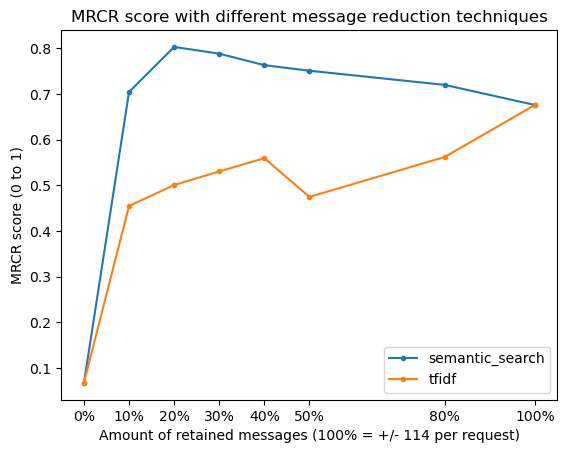

In [182]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
for name, group in df.groupby('test_name'):
    group.plot(
        y='score',
        ax=ax,
        label=name,
        style='.-'
    )

x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1]
ax.set_xticks(x)
ax.set_xticklabels([f'{int(val*100)}%' for val in x])

ax.set_xlabel('Amount of retained messages (100% = +/- 114 per request)')
ax.set_ylabel('MRCR score (0 to 1)')
ax.set_title('MRCR score with different message reduction techniques')
plt.show()

test_name
semantic_search    Axes(0.125,0.11;0.775x0.77)
tfidf              Axes(0.125,0.11;0.775x0.77)
Name: gpu_energy.request, dtype: object

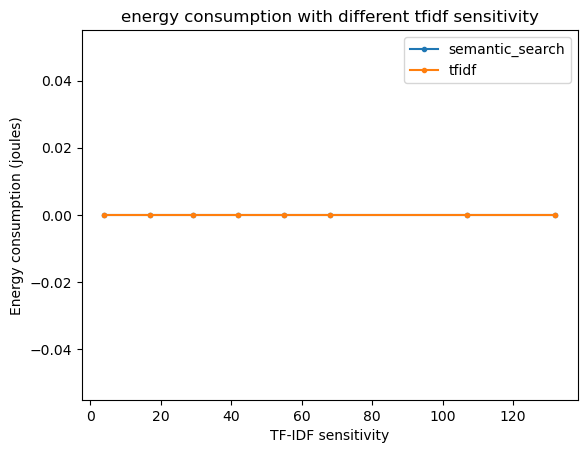

In [174]:
df.groupby('test_name')['gpu_energy.request'].plot(
    legend=True,
    xlabel='TF-IDF sensitivity',
    ylabel='Energy consumption (joules)',
    rot=0,
    title='energy consumption with different tfidf sensitivity',
    style='.-',
)

In [158]:
df.groupby('test_name')['std'].plot(
    legend=True,
    xlabel='TF-IDF sensitivity',
    ylabel='Standard deviation',
    rot=0,
    title='Differences in standard deviation',
    style='.-',
)

Series([], Name: std, dtype: float64)